## Coursera Capstone Project — The Battle of Neighbourhoods

## Introduction

I would like to recoomend **the best place to open a restaurant** in **New Delhi**

Restaurants should have **cinema and shopping places near by**. There should **more neighbourhood and also public transport facilities**.

There **shouldn't be many more restaurant** around the restaurant places so that it wont be overlooked and on the other places it will be more popular.

## Data

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import requests

!conda install -c conda-forge geocoder --yes

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


Importing data from a csv file downloaded from net

In [2]:
country = pd.read_csv('in.csv')
country.head()

,key,place_name,admin_name1,latitude,longitude,accuracy
0,IN/110001,Connaught Place,New Delhi,28.6333,77.2167,4.0
1,IN/110002,Darya Ganj,New Delhi,28.6333,77.2500,4.0
2,IN/110003,Aliganj,New Delhi,28.6500,77.2167,NaN
3,IN/110004,Rashtrapati Bhawan,New Delhi,28.6500,77.2167,NaN
4,IN/110005,Lower Camp Anand Parbat,New Delhi,28.6500,77.2000,NaN


In [3]:
lst=['Pincode', 'PlaceName', 'State', 'Latitude', 'Longitude','accuracy']
country.columns = lst
country.head()

,Pincode,PlaceName,State,Latitude,Longitude,accuracy
0,IN/110001,Connaught Place,New Delhi,28.6333,77.2167,4.0
1,IN/110002,Darya Ganj,New Delhi,28.6333,77.2500,4.0
2,IN/110003,Aliganj,New Delhi,28.6500,77.2167,NaN
3,IN/110004,Rashtrapati Bhawan,New Delhi,28.6500,77.2167,NaN
4,IN/110005,Lower Camp Anand Parbat,New Delhi,28.6500,77.2000,NaN


In [4]:
state = country[country['State']=="New Delhi"] 
state.head()

,Pincode,PlaceName,State,Latitude,Longitude,accuracy
0,IN/110001,Connaught Place,New Delhi,28.6333,77.2167,4.0
1,IN/110002,Darya Ganj,New Delhi,28.6333,77.2500,4.0
2,IN/110003,Aliganj,New Delhi,28.6500,77.2167,NaN
3,IN/110004,Rashtrapati Bhawan,New Delhi,28.6500,77.2167,NaN
4,IN/110005,Lower Camp Anand Parbat,New Delhi,28.6500,77.2000,NaN


In [5]:
state = state[['Pincode','PlaceName', 'Latitude', 'Longitude','State']]
state.head()

,Pincode,PlaceName,Latitude,Longitude,State
0,IN/110001,Connaught Place,28.6333,77.2167,New Delhi
1,IN/110002,Darya Ganj,28.6333,77.2500,New Delhi
2,IN/110003,Aliganj,28.6500,77.2167,New Delhi
3,IN/110004,Rashtrapati Bhawan,28.6500,77.2167,New Delhi
4,IN/110005,Lower Camp Anand Parbat,28.6500,77.2000,New Delhi


In [6]:
place = state[state['Pincode'].str.contains("1100")]
place.reset_index(inplace=True,drop=True)
place.head()

,Pincode,PlaceName,Latitude,Longitude,State
0,IN/110001,Connaught Place,28.6333,77.2167,New Delhi
1,IN/110002,Darya Ganj,28.6333,77.2500,New Delhi
2,IN/110003,Aliganj,28.6500,77.2167,New Delhi
3,IN/110004,Rashtrapati Bhawan,28.6500,77.2167,New Delhi
4,IN/110005,Lower Camp Anand Parbat,28.6500,77.2000,New Delhi


In [7]:
locations = place['PlaceName'].tolist()
locations

['Connaught Place',
 'Darya Ganj',
 'Aliganj',
 'Rashtrapati Bhawan',
 'Lower Camp Anand Parbat',
 'Bara Tooti',
 'Birla Lines',
 'Patel Nagar',
 'Delhi Cantt',
 'Nirman Bhawan',
 'Inderpuri',
 'Hazrat Nizamuddin',
 'Jangpura',
 'Zakhira',
 'Hauz Khas',
 'Malviya Nagar',
 'Vishnu Garden',
 'Nehru Place',
 'Flatted Factories Complex',
 'Malcha Marg',
 'Postal Saving Bureau',
 'Kidwai Nagar',
 'Lajpat Nagar',
 'Jamia Nagar',
 'Punjabi Bagh',
 'J 6block Rajouri Garden',
 'Naraina Industrial Estate',
 'Himayunpur Extn',
 'T B Hospital',
 'Gandhi Nagar',
 'Shahdara',
 'Adarsh Nagar',
 'Pitampura',
 'Inderlok',
 'Alipur',
 'Gurgaon Road',
 'A F Rajokari',
 'Bawana',
 'Sanoth',
 'Nagloi',
 'Badli',
 'Najafgarh',
 'Badarpur T P Station',
 'Palam Enclave',
 'Nangal Rava',
 'Arjan Garh',
 'Kailash',
 'Andrews Ganj',
 'Azad Nagar',
 'Wazirpur Phase Iii',
 'Zafrabad',
 'Civil Lines',
 'Paharganj',
 'Shakurbasti',
 'Munirka',
 'Janakpuri',
 'Uttam Nagar',
 'New Rajinder Nagar',
 'Bijwasan',
 'Hamda

In [8]:
import urllib.request, urllib.parse, urllib.error
import json
import ssl

api_key = False
# If you have a Google Places API key, enter it here
# api_key = 'AIzaSy___IDByT70'
# https://developers.google.com/maps/documentation/geocoding/intro

if api_key is False:
    api_key = 42
    serviceurl = 'http://py4e-data.dr-chuck.net/json?'
else :
    serviceurl = 'https://maps.googleapis.com/maps/api/geocode/json?'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
i=0
while i<len(locations):
    places = locations[i]
    city = "New Delhi"
    state = "Delhi"
    country = "India"
    address = places+","+city+","+state+","+country
    if len(address) < 1: break

    parms = dict()
    parms['address'] = address
    if api_key is not False: parms['key'] = api_key
    url = serviceurl + urllib.parse.urlencode(parms)

    uh = urllib.request.urlopen(url, context=ctx)
    data = uh.read().decode()

    try:
        js = json.loads(data)
    except:
        js = None

    if not js or 'status' not in js or js['status'] != 'OK':
        print('==== Failure To Retrieve ====')
        print(data)
        continue

    lat = js['results'][0]['geometry']['location']['lat']
    lng = js['results'][0]['geometry']['location']['lng']
    place.loc[place.PlaceName == places, 'Latitude'] = lat
    place.loc[place.PlaceName == places, 'Longitude'] = lng
    i=i+1

In [9]:
place[:10]

,Pincode,PlaceName,Latitude,Longitude,State
0,IN/110001,Connaught Place,28.630420,77.217722,New Delhi
1,IN/110002,Darya Ganj,28.644847,77.240377,New Delhi
2,IN/110003,Aliganj,28.576218,77.222912,New Delhi
3,IN/110004,Rashtrapati Bhawan,28.614348,77.199430,New Delhi
4,IN/110005,Lower Camp Anand Parbat,28.664941,77.174777,New Delhi
5,IN/110006,Bara Tooti,28.658524,77.212699,New Delhi
6,IN/110007,Birla Lines,28.613939,77.209021,New Delhi
7,IN/110008,Patel Nagar,28.655418,77.164620,New Delhi
8,IN/110010,Delhi Cantt,28.596128,77.158738,New Delhi
9,IN/110011,Nirman Bhawan,28.610949,77.215099,New Delhi


In [10]:
latitude = 28.630420
longitude = 77.217722
map_place = folium.Map(location=[latitude, longitude], zoom_start=12)
pincodes = list()

for lat, lng, places, state, pin in zip(place['Latitude'], place['Longitude'], place['PlaceName'], place['State'], place['Pincode']):
    label = '{}, {}'.format(places, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_place)
map_place

In [11]:
CLIENT_ID = 'GTJ4THMYI5AVWRBTD0IGQYACZSFDQXYO44IUPMCEC3CYWYI0' # your Foursquare ID
CLIENT_SECRET = 'ZN033TLUJXDFT4FENBU3PKS0Q2D5X1BI5TLRKLZG51SEOGFD' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GTJ4THMYI5AVWRBTD0IGQYACZSFDQXYO44IUPMCEC3CYWYI0
CLIENT_SECRET:ZN033TLUJXDFT4FENBU3PKS0Q2D5X1BI5TLRKLZG51SEOGFD


In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
place_venues = getNearbyVenues(names=place['PlaceName'],latitudes=place['Latitude'],longitudes=place['Longitude'])

Connaught Place
Darya Ganj
Aliganj
Rashtrapati Bhawan
Lower Camp Anand Parbat
Bara Tooti
Birla Lines
Patel Nagar
Delhi Cantt
Nirman Bhawan
Inderpuri
Hazrat Nizamuddin
Jangpura
Zakhira
Hauz Khas
Malviya Nagar
Vishnu Garden
Nehru Place
Flatted Factories Complex
Malcha Marg
Postal Saving Bureau
Kidwai Nagar
Lajpat Nagar
Jamia Nagar
Punjabi Bagh
J 6block Rajouri Garden
Naraina Industrial Estate
Himayunpur Extn
T B Hospital
Gandhi Nagar
Shahdara
Adarsh Nagar
Pitampura
Inderlok
Alipur
Gurgaon Road
A F Rajokari
Bawana
Sanoth
Nagloi
Badli
Najafgarh
Badarpur T P Station
Palam Enclave
Nangal Rava
Arjan Garh
Kailash
Andrews Ganj
Azad Nagar
Wazirpur Phase Iii
Zafrabad
Civil Lines
Paharganj
Shakurbasti
Munirka
Janakpuri
Uttam Nagar
New Rajinder Nagar
Bijwasan
Hamdard Nagar
Paschim Vihar
Hari Nagar Be Block
East Of Kailash
R K Puram
D D A Munirka
Vasant Kunj
Chhawla
Jharoda Kalan
Ujwa
Kanjhawala
Khera Kalan
Mangolpuri Block A
Kutubgarh
Shalimar Bagh
Himmatpuri
Shakarpur
Nand Nagri A Block
Gokulpuri


In [15]:
place_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Connaught Place,28.63042,77.217722,Fabindia,28.632012,77.217729,Clothing Store
1,Connaught Place,28.63042,77.217722,Jain Chawal Wale,28.630052,77.217649,Food Truck
2,Connaught Place,28.63042,77.217722,Johnny Rockets,28.630457,77.219594,Bistro
3,Connaught Place,28.63042,77.217722,HOTEL SARAVANA BHAVAN,28.632319,77.216445,South Indian Restaurant
4,Connaught Place,28.63042,77.217722,Starbucks,28.632011,77.217731,Coffee Shop


In [16]:
print('There are {} uniques categories.'.format(len(place_venues['Venue Category'].unique())))

There are 127 uniques categories.


In [17]:
# one hot encoding
place_onehot = pd.get_dummies(place_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
place_onehot['Neighborhood'] = place_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [place_onehot.columns[-1]] + list(place_onehot.columns[:-1])
place_onehot = place_onehot[fixed_columns]

place_onehot.head()

,Neighborhood,ATM,Airport Service,Airport Terminal,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Spa,Stables,Tailor Shop,Tea Room,Temple,Theater,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Yoga Studio
0,Connaught Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Connaught Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Connaught Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Connaught Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Connaught Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
place_group = place_onehot.groupby('Neighborhood').sum().reset_index()
place_group.set_index("Neighborhood", inplace = True)
place_group

,ATM,Airport Service,Airport Terminal,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,...,Spa,Stables,Tailor Shop,Tea Room,Temple,Theater,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Aliganj,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Alipur,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrews Ganj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arjan Garh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vasant Kunj,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vishnu Garden,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wazirpur Phase Iii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
place_group.columns

Index(['ATM', 'Airport Service', 'Airport Terminal', 'Arcade', 'Art Gallery',
       'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports',
       'BBQ Joint', 'Bakery',
       ...
       'Spa', 'Stables', 'Tailor Shop', 'Tea Room', 'Temple', 'Theater',
       'Train Station', 'Vegetarian / Vegan Restaurant', 'Warehouse Store',
       'Yoga Studio'],
      dtype='object', length=127)

In [20]:
df = place_group[place_group.columns.difference(['ATM','Chinese Restaurant','Asian Restaurant','Fast Food Restaurant','Gourmet Shop','Indian Restaurant','Nightclub','Pharmacy','Playground','Pub'])]
df

,Airport Service,Airport Terminal,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Spa,Stables,Tailor Shop,Tea Room,Temple,Theater,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Aliganj,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alipur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrews Ganj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arjan Garh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vasant Kunj,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vishnu Garden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wazirpur Phase Iii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df['Total'] = df.sum(axis=1)
df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Airport Service,Airport Terminal,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Stables,Tailor Shop,Tea Room,Temple,Theater,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Yoga Studio,Total
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
Aliganj,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Alipur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrews Ganj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
Arjan Garh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vasant Kunj,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Vishnu Garden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wazirpur Phase Iii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [22]:
df.sort_values('Total',inplace=True,ascending=False)
df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Airport Service,Airport Terminal,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Stables,Tailor Shop,Tea Room,Temple,Theater,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Yoga Studio,Total
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Connaught Place,0,0,0,0,1,0,1,1,0,5,...,0,0,1,0,0,0,0,0,0,54
Paharganj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
D D A Munirka,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,23
Nehru Place,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,22
Kailash,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Najafgarh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alipur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vishnu Garden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df[:10]

,Airport Service,Airport Terminal,Arcade,Art Gallery,Arts & Crafts Store,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,...,Stables,Tailor Shop,Tea Room,Temple,Theater,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Yoga Studio,Total
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Connaught Place,0,0,0,0,1,0,1,1,0,5,...,0,0,1,0,0,0,0,0,0,54
Paharganj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
D D A Munirka,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,23
Nehru Place,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,22
Kailash,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15
Lajpat Nagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
T B Hospital,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,9
Darya Ganj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
Postal Saving Bureau,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8


In [24]:
count = df["Total"].to_frame()

In [25]:
import matplotlib.pyplot as plt
count = count[:10]

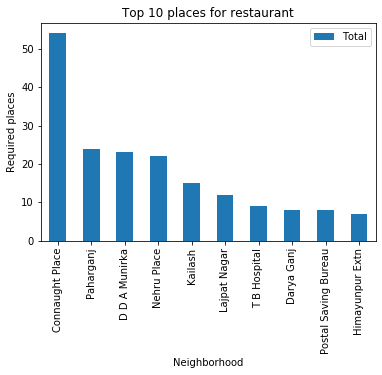

In [26]:
count.plot(kind="bar")
plt.title('Top 10 places for restaurant')
plt.ylabel('Required places')
plt.xlabel('Neighborhood')
plt.show()

In [27]:
lst = count.index.tolist()
df2 = place[place.PlaceName.isin(lst)]
print(lst)

['Connaught Place', 'Paharganj', 'D D A Munirka', 'Nehru Place', 'Kailash', 'Lajpat Nagar', 'T B Hospital', 'Darya Ganj', 'Postal Saving Bureau', 'Himayunpur Extn']


In [28]:
df2

,Pincode,PlaceName,Latitude,Longitude,State
0,IN/110001,Connaught Place,28.630420,77.217722,New Delhi
1,IN/110002,Darya Ganj,28.644847,77.240377,New Delhi
17,IN/110019,Nehru Place,28.550331,77.250189,New Delhi
20,IN/110022,Postal Saving Bureau,28.645537,77.180447,New Delhi
22,IN/110024,Lajpat Nagar,28.564903,77.240332,New Delhi
27,IN/110029,Himayunpur Extn,28.561297,77.196142,New Delhi
28,IN/110030,T B Hospital,28.528800,77.188422,New Delhi
46,IN/110048,Kailash,28.553945,77.249125,New Delhi
52,IN/110055,Paharganj,28.645605,77.212778,New Delhi
64,IN/110067,D D A Munirka,28.556133,77.167771,New Delhi


In [29]:
latitude = 28.630420
longitude = 77.217722
map_place = folium.Map(location=[latitude, longitude], zoom_start=12)
pincodes = list()

for lat, lng, places, state, pin in zip(df2['Latitude'], df2['Longitude'], df2['PlaceName'], df2['State'], df2['Pincode']):
    label = '{}, {}'.format(places, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_place)
map_place